## Edge detection, Edge length calculation and angle of change in gradient for the image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from pprint import pprint
from collections import Counter

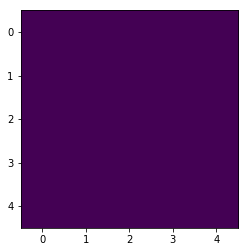

In [65]:
# image = cv2.imread('square.png',0)
# image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)[1]
# image = cv2.resize(cv2.imread('IA4.jpg', cv2.IMREAD_GRAYSCALE),(300,300))

image = np.array([[1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1],
                  [1,1,1,1,1]])


plt.imshow(image)
cv2.imshow('original image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
np.unique(image)

array([1])

In [67]:
gx = np.array([[-1,-2,-1],
               [0, 0, 0],
               [1, 2, 1]])
gy = np.array([[-1, 0, 1],
               [-2, 0, 2],
               [-1, 0, 1] ])

In [68]:
def get_edge_images(image, gx, gy):
    pad = (gx.shape[0])//2

    im1 = np.pad(image.copy(), ((pad,pad),(pad,pad)), 'edge')
    im2 = im1.copy()
    k = gx.shape[0]

    out_x = np.empty_like(image.copy())
    for i in range(image.shape[0] - k + 1):
        for j in range(image.shape[1] - k + 1):
            out_x[i,j] = np.sum(gx * im1[i:i+k,j:j+k])
    out_y = np.empty_like(image.copy())
    for i in range(image.shape[0] - k + 1):
        for j in range(image.shape[1] - k + 1):
            out_y[i,j] = np.sum(gy * im2[i:i+k,j:j+k])
    G = np.hypot(out_x, out_y)
    print(G)
    G = G / G.max() * 255
    tan_aplha = np.arctan2(out_y.copy(), out_x.copy())
    return out_x, out_y, tan_aplha

In [69]:
res_x, res_y, tan_aplha = get_edge_images(image.copy(), gx.copy(), gy.copy())

[[0.         0.         0.         1.41421356 1.41421356]
 [0.         0.         0.         1.41421356 1.41421356]
 [0.         0.         0.         1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356]
 [1.41421356 1.41421356 1.41421356 1.41421356 1.41421356]]


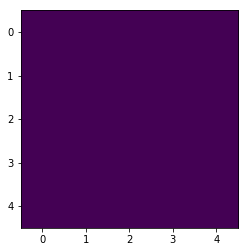

In [70]:
tan_alpha = tan_aplha.astype('int')
plt.imshow(tan_alpha)

In [71]:
for i in range(tan_aplha.shape[0]):
    for j in range(tan_aplha.shape[1]):
        print(tan_aplha[i,j], end=" ")
    print()

0.0 0.0 0.0 0.7853981633974483 0.7853981633974483 
0.0 0.0 0.0 0.7853981633974483 0.7853981633974483 
0.0 0.0 0.0 0.7853981633974483 0.7853981633974483 
0.7853981633974483 0.7853981633974483 0.7853981633974483 0.7853981633974483 0.7853981633974483 
0.7853981633974483 0.7853981633974483 0.7853981633974483 0.7853981633974483 0.7853981633974483 


In [72]:
angles = np.array(((np.unique(tan_aplha)) * 180) / np.pi)
angles

array([ 0., 45.])

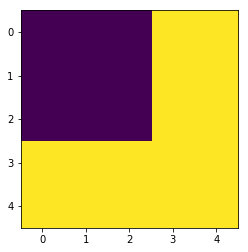

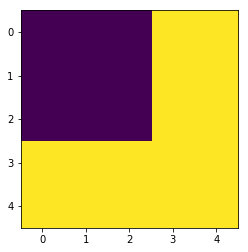

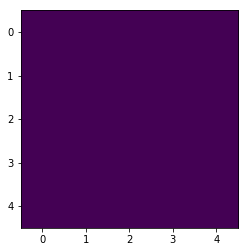

In [73]:
cv2.imshow('horizontal_edges', res_x)
cv2.imshow('vertical_edges', res_y)
cv2.imshow('horizontal + vertical', res_x.copy() + res_y.copy())

plt.imshow(res_x)
plt.show()
plt.imshow(res_y)
plt.show()
plt.imshow(image)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

In [49]:
def get_len_of_edges(image):
    dic_len = {}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] not in dic_len:
                dic_len[image[i,j]] = 0
            dic_len[image[i,j]] += 1
    pprint(dic_len)

In [50]:
ret, labels = cv2.connectedComponents(res_x.copy() + res_y.copy())
print(ret, labels)
get_len_of_edges(labels)
cv2.imshow('labels', labels)
cv2.waitKey(0)
cv2.destroyAllWindows()

64 [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 1 1]
 [3 3 3 ... 1 1 0]
 [3 3 3 ... 1 1 0]]
{0: 87815,
 1: 355,
 2: 1374,
 3: 96,
 4: 6,
 5: 6,
 6: 6,
 7: 6,
 8: 6,
 9: 6,
 10: 6,
 11: 6,
 12: 6,
 13: 6,
 14: 6,
 15: 6,
 16: 6,
 17: 6,
 18: 6,
 19: 6,
 20: 6,
 21: 6,
 22: 6,
 23: 6,
 24: 6,
 25: 6,
 26: 6,
 27: 6,
 28: 6,
 29: 6,
 30: 6,
 31: 6,
 32: 6,
 33: 6,
 34: 6,
 35: 6,
 36: 6,
 37: 6,
 38: 6,
 39: 6,
 40: 6,
 41: 6,
 42: 6,
 43: 6,
 44: 6,
 45: 6,
 46: 6,
 47: 6,
 48: 6,
 49: 6,
 50: 6,
 51: 6,
 52: 6,
 53: 6,
 54: 6,
 55: 6,
 56: 6,
 57: 6,
 58: 6,
 59: 6,
 60: 6,
 61: 6,
 62: 6,
 63: 6}


In [51]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63], dtype=int32)

In [12]:
import matplotlib.pyplot as plt

In [52]:
labels_image = cv2.cvtColor(labels.astype(np.uint8), cv2.COLOR_GRAY2BGR)
cv2.imshow('image', labels_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

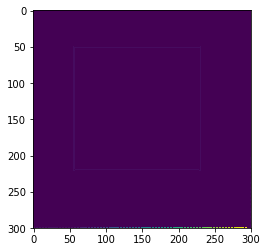

In [53]:
# plt.figure(figsize = (30,30))
# plt.grid(True)
plt.imshow(labels.copy())
plt.show()